In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Bangalore_house_price_prediction.csv')

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
for column in df.columns:
    # Get unique values and their counts
    unique_values_counts = df[column].value_counts()
    print(f"{column}:\n{unique_values_counts}")

area_type:
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability:
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location:
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size:
size
2 BHK         5199
3 BHK       

In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:

# Function to convert 'date-month' to datetime, if applicable
def convert_to_datetime(value):
    try:
        return pd.to_datetime(value, format='%d-%b', errors='coerce')
    except:
        return pd.NaT

# Apply conversion
df['availability_converted'] = df['availability'].apply(convert_to_datetime)

# Mark non-date entries
df['is_special'] = df['availability'].isin(['Ready To Move', 'Immediate Possession'])

# Fill non-date entries with a high date to ensure they appear after all real dates when sorting
high_date = pd.to_datetime('2099-12-31')
df.loc[df['is_special'], 'availability_converted'] = high_date

# Sort by the converted date
df = df.sort_values(by='availability_converted').reset_index(drop=True)

# Remove the temporary columns if not needed
df.drop(columns=['availability_converted', 'is_special'], inplace=True)

print(df)



                  area_type   availability             location       size  \
0                Plot  Area         16-Jan       Sarjapur  Road  4 Bedroom   
1      Super built-up  Area         17-Jan          Thanisandra      3 BHK   
2                Plot  Area         18-Jan          Kathriguppe  2 Bedroom   
3      Super built-up  Area         18-Jan           Whitefield      2 BHK   
4      Super built-up  Area         18-Jan          Hennur Road      2 BHK   
...                     ...            ...                  ...        ...   
13315  Super built-up  Area  Ready To Move       Sarjapur  Road      3 BHK   
13316  Super built-up  Area  Ready To Move       Dodda Nekkundi      2 BHK   
13317  Super built-up  Area  Ready To Move          Thanisandra      2 BHK   
13318            Plot  Area  Ready To Move  Hosahalli Extension  9 Bedroom   
13319  Super built-up  Area  Ready To Move         Doddathoguru      1 BHK   

       society total_sqft  bath  balcony   price  
0      Saace

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
import seaborn as sn

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


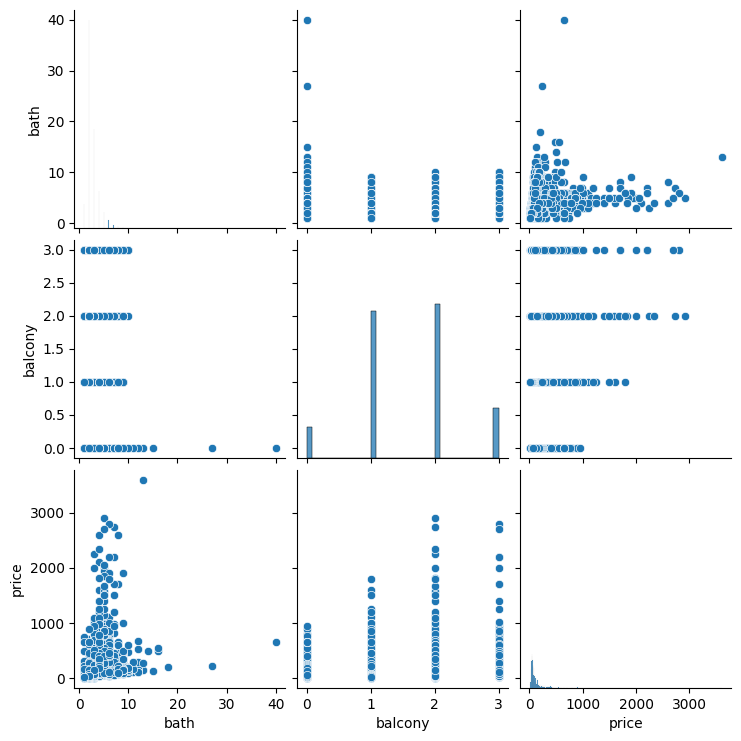

In [ ]:
sn.pairplot(data=df)

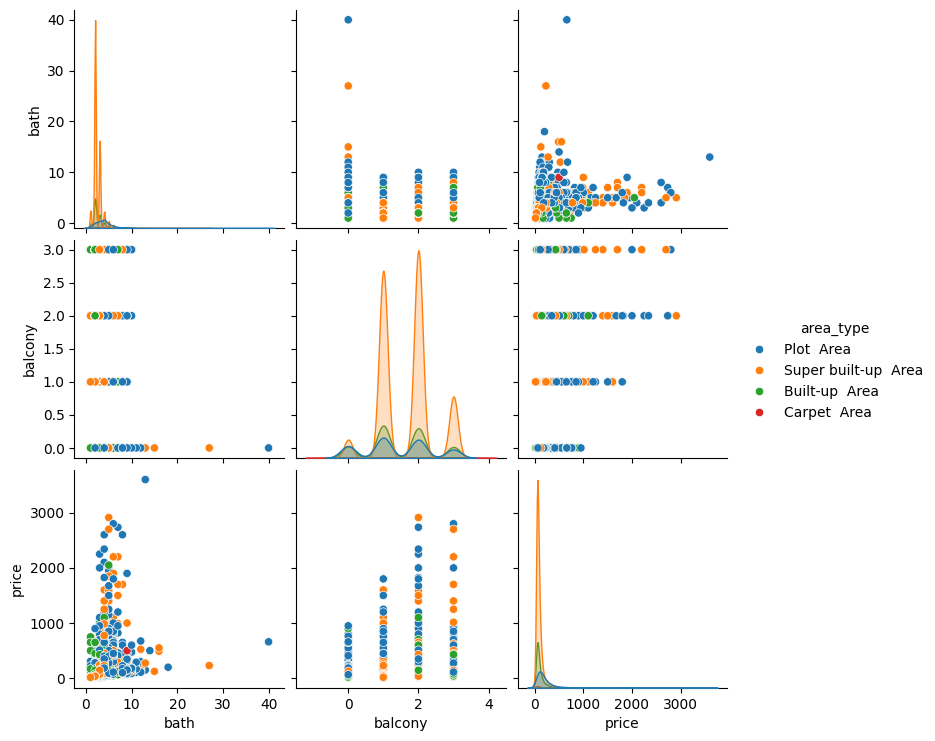

In [ ]:
sn.pairplot(hue='area_type',data=df)

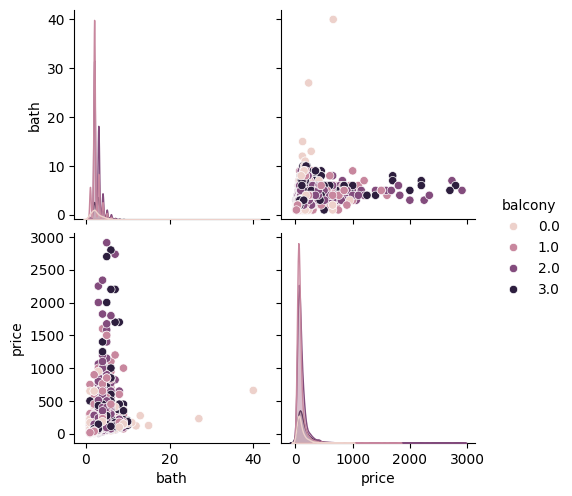

In [ ]:
sn.pairplot(hue='balcony',data=df)

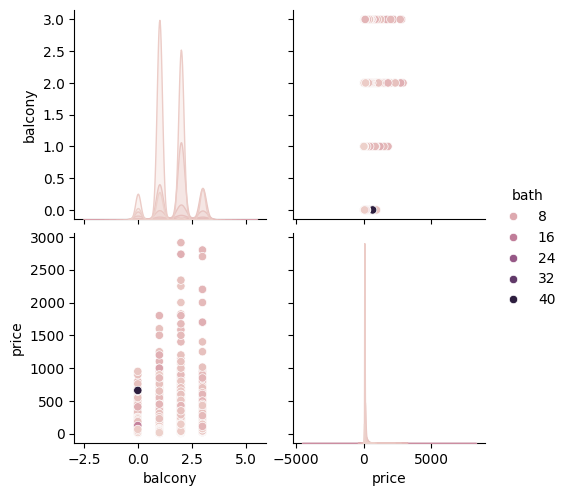

In [ ]:
sn.pairplot(hue='bath',data=df)

In [ ]:
import seaborn as sns

<Axes: xlabel='area_type', ylabel='bath'>

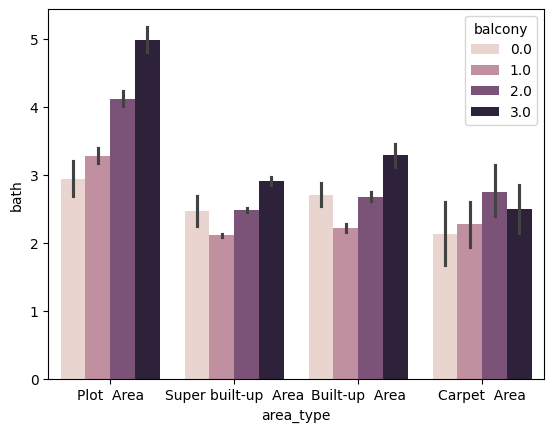

In [ ]:
sns.barplot(df, x="area_type", y="bath", hue="balcony")

<Axes: xlabel='area_type', ylabel='balcony'>

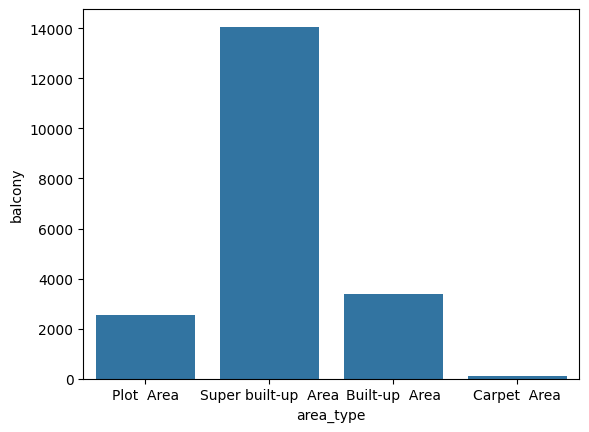

In [ ]:
sns.barplot(df, x="area_type", y="balcony", estimator="sum", errorbar=None)


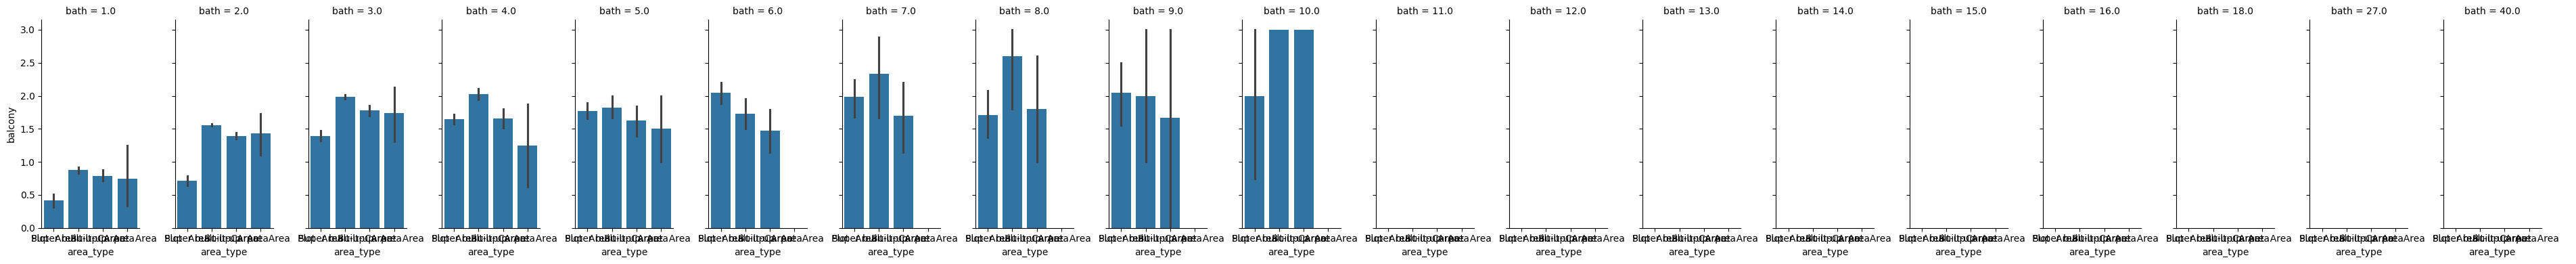

In [ ]:
sns.catplot(
    df, kind="bar",
    x="area_type", y="balcony", col="bath",
    height=4, aspect=.5,
)

In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

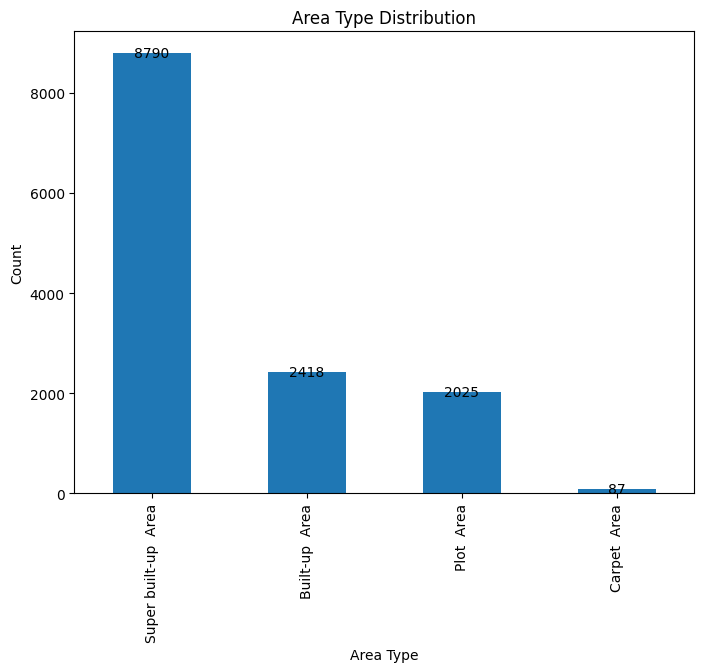

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each area type
area_type_counts = df['area_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
area_type_counts.plot(kind='bar')
plt.title('Area Type Distribution')
plt.xlabel('Area Type')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

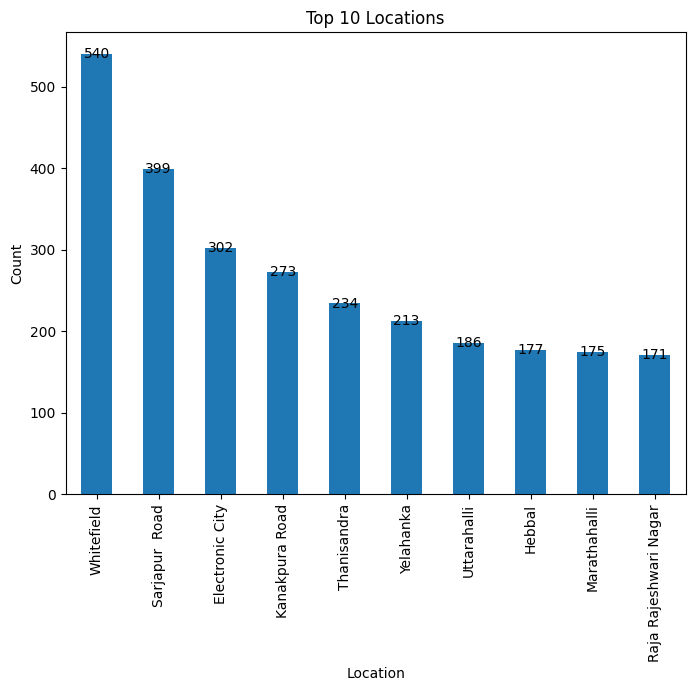

In [ ]:
location_counts = df['location'].value_counts()

# Plot the top 10 locations
plt.figure(figsize=(8, 6))
location_counts.nlargest(10).plot(kind='bar')
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

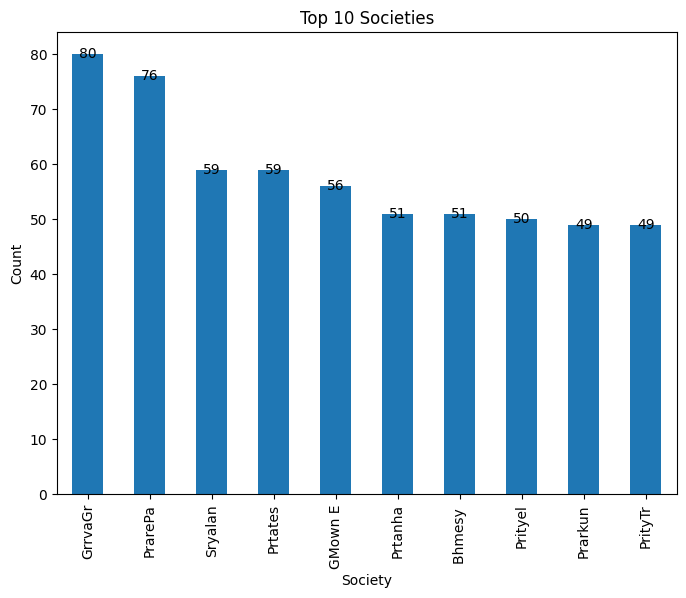

In [ ]:
# Get the count of each society
society_counts = df['society'].value_counts()

# Plot the top 10 societies
plt.figure(figsize=(8, 6))
society_counts.nlargest(10).plot(kind='bar')
plt.title('Top 10 Societies')
plt.xlabel('Society')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

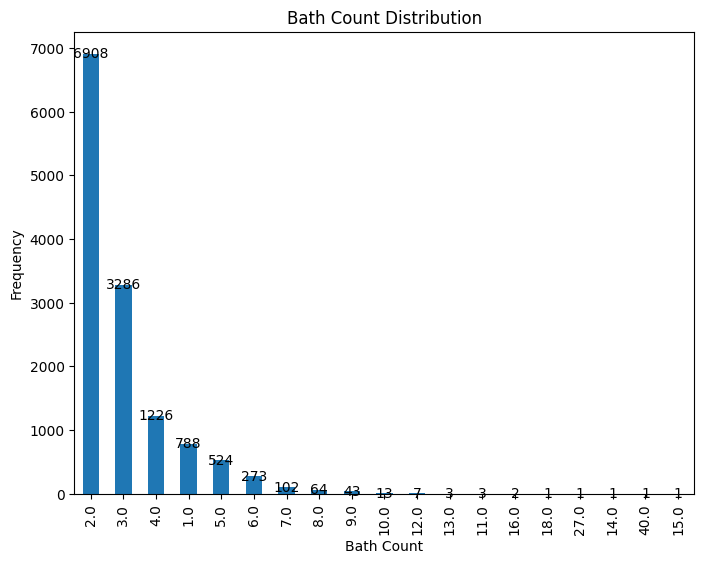

In [ ]:
# Plot bath column
plt.figure(figsize=(8, 6))
df['bath'].value_counts().plot(kind='bar')
plt.title('Bath Count Distribution')
plt.xlabel('Bath Count')
plt.ylabel('Frequency')

# Add values on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

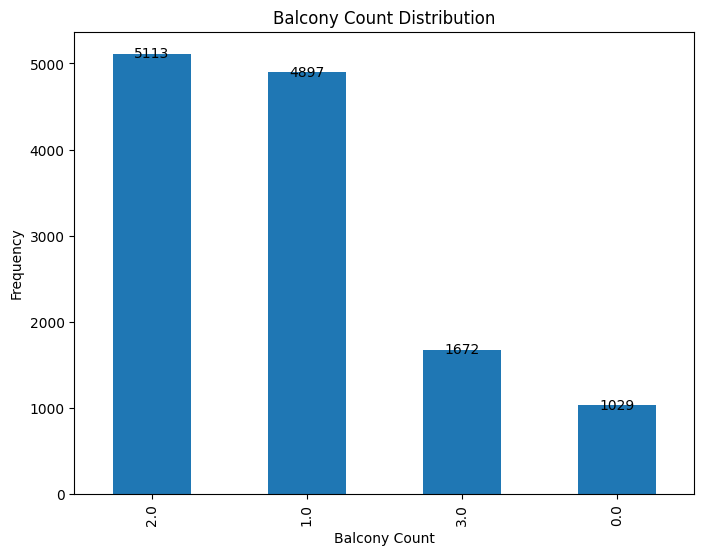

In [ ]:
# Plot balcony column
plt.figure(figsize=(8, 6))
df['balcony'].value_counts().plot(kind='bar')
plt.title('Balcony Count Distribution')
plt.xlabel('Balcony Count')
plt.ylabel('Frequency')

# Add values on top of each bar
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

In [ ]:
# Group by area_type and count unique locations
area_type_location_counts = df.groupby('area_type')['location'].nunique().reset_index()

# Rename the column
area_type_location_counts = area_type_location_counts.rename(columns={'location': 'num_locations'})

# Print the result
print(area_type_location_counts)

              area_type  num_locations
0        Built-up  Area            661
1          Carpet  Area             64
2            Plot  Area            696
3  Super built-up  Area            901


In [ ]:
import pandas as pd

# Group by area_type and count locations
area_type_location_counts = df.groupby('area_type')['location'].count().reset_index()

# Rename the column
area_type_location_counts = area_type_location_counts.rename(columns={'location': 'num_locations'})

# Print the result
print(area_type_location_counts)

              area_type  num_locations
0        Built-up  Area           2418
1          Carpet  Area             87
2            Plot  Area           2025
3  Super built-up  Area           8789


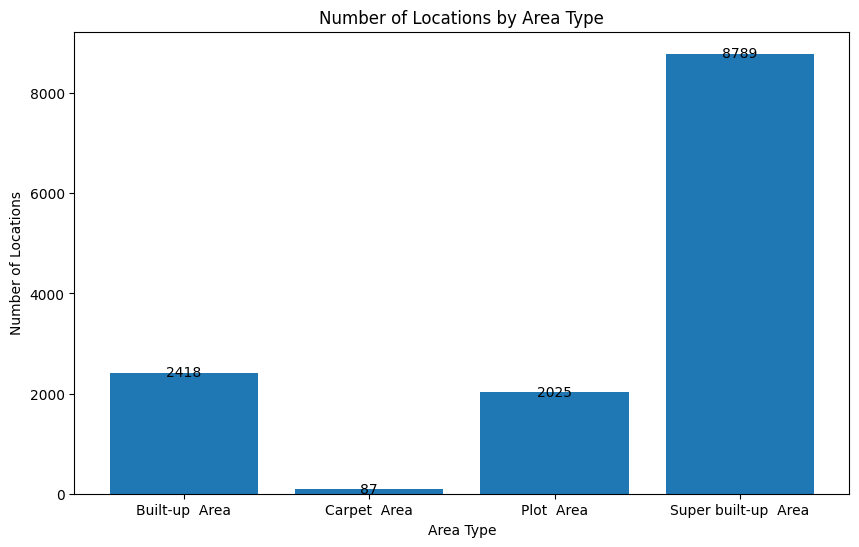

In [ ]:
# Plot the result
plt.figure(figsize=(10,6))
plt.bar(area_type_location_counts['area_type'], area_type_location_counts['num_locations'])
plt.xlabel('Area Type')
plt.ylabel('Number of Locations')
plt.title('Number of Locations by Area Type')
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

In [ ]:
import pandas as pd

# Group by area_type and count unique locations
area_type_location_counts_unique = df.groupby('area_type')['location'].nunique().reset_index()

# Rename the column
area_type_location_counts_unique = area_type_location_counts_unique.rename(columns={'location': 'num_locations'})

# Print the result
print(area_type_location_counts_unique)

              area_type  num_locations
0        Built-up  Area            661
1          Carpet  Area             64
2            Plot  Area            696
3  Super built-up  Area            901


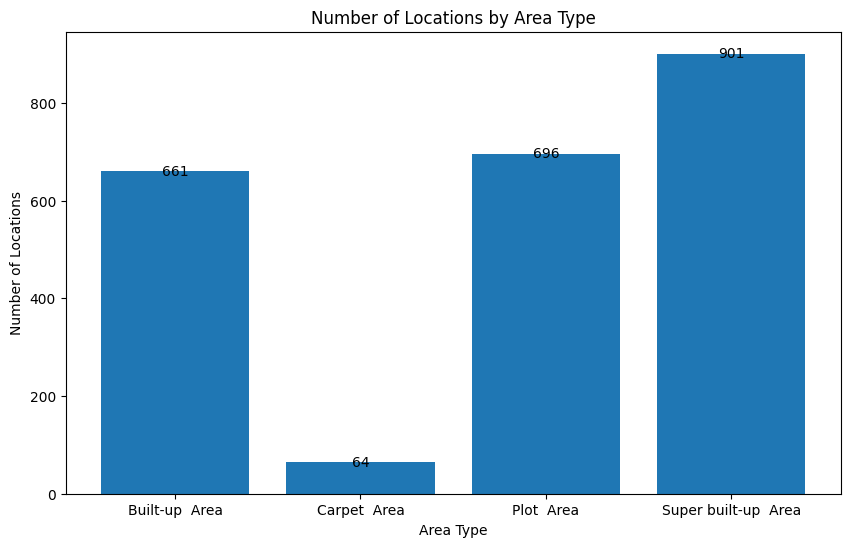

In [ ]:
# Plot the result
plt.figure(figsize=(10,6))
plt.bar(area_type_location_counts_unique['area_type'], area_type_location_counts_unique['num_locations'])
plt.xlabel('Area Type')
plt.ylabel('Number of Locations')
plt.title('Number of Locations by Area Type')
for p in plt.gca().patches:
    plt.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.show()

In [ ]:
# IN EACh LOCATTION HOW MANY UNIQUE SOCIETY
location_society_counts = df.groupby('location')['society'].nunique().reset_index()

# Rename the column
location_society_counts = location_society_counts.rename(columns={'society': 'num_societies'})

# Print the result
print(location_society_counts)

                  location  num_societies
0                   Anekal              0
1                Banaswadi              1
2              Basavangudi              0
3              Bhoganhalli              1
4      Devarabeesana Halli              1
...                    ...            ...
1300             t.c palya              0
1301              tc.palya              0
1302         vinayakanagar              0
1303  white field,kadugodi              0
1304            whitefiled              0

[1305 rows x 2 columns]


In [ ]:
# Group by location and society, and count the number of occurrences
location_society_occurrences = df.groupby(['location', 'society']).size().reset_index(name='count')

# Find the maximum society in each location
location_max_society = location_society_occurrences.loc[location_society_occurrences.groupby('location')['count'].idxmax()]

# Print the result
print(location_max_society)

                            location  society  count
0                          Banaswadi  Krntsee      1
1                        Bhoganhalli  Rosha I      1
2                Devarabeesana Halli  Sorisa       4
9                Devarachikkanahalli  Wiaysld      2
10                   Electronic City  GMown E      2
...                              ...      ...    ...
2711              Yelahanka New Town  KHatsFl     16
2714                     Yelenahalli  Jaers S      1
2717                          Yemlur  Epllan       5
2723                    Yeshwanthpur  IBityin     45
2732  Yeshwanthpur Industrial Suburb  Essic C      2

[648 rows x 3 columns]


In [ ]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,16-Jan,Sarjapur Road,4 Bedroom,Saacesa,1240,4.0,0.0,110.00
1,Super built-up Area,17-Jan,Thanisandra,3 BHK,Soitya,2087,4.0,2.0,139.00
2,Plot Area,18-Jan,Kathriguppe,2 Bedroom,NaN,754,2.0,0.0,69.99
3,Super built-up Area,18-Jan,Whitefield,2 BHK,Suhamra,1170,2.0,1.0,56.00
4,Super built-up Area,18-Jan,Hennur Road,2 BHK,Asadacy,1359,2.0,2.0,104.00
...,...,...,...,...,...,...,...,...,...
13315,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,Adeatlm,1846,3.0,3.0,145.00
13316,Super built-up Area,Ready To Move,Dodda Nekkundi,2 BHK,NaN,1155,2.0,1.0,46.00
13317,Super built-up Area,Ready To Move,Thanisandra,2 BHK,SLaceda,1140,2.0,1.0,36.00
13318,Plot Area,Ready To Move,Hosahalli Extension,9 Bedroom,NaN,750,6.0,3.0,112.00


In [ ]:

def convert_to_sqft(value):
    # Remove any extra spaces
    value = value.replace(" ", "")

    # If the value is a range like '981-1249', take the average
    if '-' in value:
        low, high = map(float, value.split('-'))
        return (low + high) / 2

    # Check for different units and convert accordingly
    if 'Sq.Meter' in value:
        sqft = float(value.replace('Sq.Meter', '')) * 10.7639
    elif 'Acres' in value:
        sqft = float(value.replace('Acres', '')) * 43560
    elif 'Sq.Yards' in value:
        sqft = float(value.replace('Sq.Yards', '')) * 9
    elif 'Perch' in value:
        sqft = float(value.replace('Perch', '')) * 272.25
    elif 'Guntha' in value:
        sqft = float(value.replace('Guntha', '')) * 1089
    elif 'Cents' in value:
        sqft = float(value.replace('Cents', '')) * 435.6
    elif 'Grounds' in value:
        sqft = float(value.replace('Grounds', '')) * 2400
    else:
        # If there's no unit, assume it's already in sqft
        sqft = float(value)

    return sqft

# Apply the conversion function to the 'total_sqft' column
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)

print(df)

                  area_type   availability             location       size  \
0                Plot  Area         16-Jan       Sarjapur  Road  4 Bedroom   
1      Super built-up  Area         17-Jan          Thanisandra      3 BHK   
2                Plot  Area         18-Jan          Kathriguppe  2 Bedroom   
3      Super built-up  Area         18-Jan           Whitefield      2 BHK   
4      Super built-up  Area         18-Jan          Hennur Road      2 BHK   
...                     ...            ...                  ...        ...   
13315  Super built-up  Area  Ready To Move       Sarjapur  Road      3 BHK   
13316  Super built-up  Area  Ready To Move       Dodda Nekkundi      2 BHK   
13317  Super built-up  Area  Ready To Move          Thanisandra      2 BHK   
13318            Plot  Area  Ready To Move  Hosahalli Extension  9 Bedroom   
13319  Super built-up  Area  Ready To Move         Doddathoguru      1 BHK   

       society  total_sqft  bath  balcony   price  
0      Saac

In [ ]:
print(df[df['location'].isnull()])

                 area_type   availability location   size  society  \
9033  Super built-up  Area  Ready To Move      NaN  3 BHK  Grare S   

      total_sqft  bath  balcony  price  
9033      1600.0   3.0      2.0   86.0  


In [ ]:
location = df.loc[df['society'] == 'Grare S', 'location'].values[0]
print(f"The society 'Grare S' is located in {location}.")

The society 'Grare S' is located in Anantapura.


In [ ]:
anantpura_df = df.loc[df['location'] == 'Anantapura']
print(anantpura_df)

                  area_type   availability    location       size  society  \
4795           Carpet  Area  Ready To Move  Anantapura      3 BHK  Grare S   
9859             Plot  Area  Ready To Move  Anantapura  3 Bedroom  Edleyil   
10907  Super built-up  Area  Ready To Move  Anantapura      2 BHK      NaN   

       total_sqft  bath  balcony  price  
4795       1600.0   3.0      2.0   77.0  
9859       1650.0   4.0      NaN  160.0  
10907      1200.0   2.0      2.0   37.0  


In [ ]:
df['location'].fillna('Anantpura', inplace=True)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
import numpy as np

In [ ]:
filtered_df = df[df.groupby('location')['society'].transform('count') >10]

In [ ]:
filtered_df.isnull().sum()

area_type          0
availability       0
location           0
size              12
society         2408
total_sqft         0
bath              67
balcony          364
price              0
dtype: int64

In [ ]:
# Step 1: Determine the most frequent society for each location
mode_society = filtered_df.groupby('location')['society'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 2: Define a function to fill missing values
def fill_missing_society(row):
    if pd.isna(row['society']):
        return mode_society[row['location']]
    else:
        return row['society']

# Step 3: Apply the function to fill missing values
filtered_df['society'] = filtered_df.apply(fill_missing_society, axis=1)

print(filtered_df)

                  area_type   availability        location       size  \
0                Plot  Area         16-Jan  Sarjapur  Road  4 Bedroom   
1      Super built-up  Area         17-Jan     Thanisandra      3 BHK   
3      Super built-up  Area         18-Jan      Whitefield      2 BHK   
4      Super built-up  Area         18-Jan     Hennur Road      2 BHK   
6      Super built-up  Area         18-Jan       Yelahanka      2 BHK   
...                     ...            ...             ...        ...   
13310  Super built-up  Area  Ready To Move     Kaggalipura      2 BHK   
13315  Super built-up  Area  Ready To Move  Sarjapur  Road      3 BHK   
13316  Super built-up  Area  Ready To Move  Dodda Nekkundi      2 BHK   
13317  Super built-up  Area  Ready To Move     Thanisandra      2 BHK   
13319  Super built-up  Area  Ready To Move    Doddathoguru      1 BHK   

       society  total_sqft  bath  balcony  price  
0      Saacesa      1240.0   4.0      0.0  110.0  
1      Soitya       2

<ipython-input-46-1903dda27415>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['society'] = filtered_df.apply(fill_missing_society, axis=1)


In [ ]:
filtered_df.isnull().sum()

area_type         0
availability      0
location          0
size             12
society           0
total_sqft        0
bath             67
balcony         364
price             0
dtype: int64

In [ ]:
filtered_df['size'].fillna(method='ffill',inplace=True)

<ipython-input-48-cca8a93aeeab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['size'].fillna(method='ffill',inplace=True)


In [ ]:
filtered_df.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath             67
balcony         364
price             0
dtype: int64

In [ ]:
filtered_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,16-Jan,Sarjapur Road,4 Bedroom,Saacesa,1240.0,4.0,0.0,110.0
1,Super built-up Area,17-Jan,Thanisandra,3 BHK,Soitya,2087.0,4.0,2.0,139.0
3,Super built-up Area,18-Jan,Whitefield,2 BHK,Suhamra,1170.0,2.0,1.0,56.0
4,Super built-up Area,18-Jan,Hennur Road,2 BHK,Asadacy,1359.0,2.0,2.0,104.0
6,Super built-up Area,18-Jan,Yelahanka,2 BHK,Prensya,1362.0,2.0,2.0,66.0
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Kaggalipura,2 BHK,Baowsig,950.0,2.0,1.0,47.0
13315,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,Adeatlm,1846.0,3.0,3.0,145.0
13316,Super built-up Area,Ready To Move,Dodda Nekkundi,2 BHK,Adstah,1155.0,2.0,1.0,46.0
13317,Super built-up Area,Ready To Move,Thanisandra,2 BHK,SLaceda,1140.0,2.0,1.0,36.0


In [ ]:
def extract_bhk(size):
    if 'BHK' in size:
        # Extract the number before BHK
        bedrooms = int(size.split(' ')[0])
        halls = 1
        kitchens = 1
    elif 'Bedroom' in size:
        # Extract the number before Bedroom
        bedrooms = int(size.split(' ')[0])
        halls = 0
        kitchens = 0
    else:
        bedrooms = 0
        halls = 0
        kitchens = 0
    return pd.Series([bedrooms, halls, kitchens])

# Apply the function to create new columns
filtered_df[['bedroom', 'hall', 'kitchen']] = filtered_df['size'].apply(extract_bhk)

# Drop the original size column if no longer needed
filtered_df.drop('size', axis=1, inplace=True)

print(filtered_df)


                  area_type   availability        location  society  \
0                Plot  Area         16-Jan  Sarjapur  Road  Saacesa   
1      Super built-up  Area         17-Jan     Thanisandra  Soitya    
3      Super built-up  Area         18-Jan      Whitefield  Suhamra   
4      Super built-up  Area         18-Jan     Hennur Road  Asadacy   
6      Super built-up  Area         18-Jan       Yelahanka  Prensya   
...                     ...            ...             ...      ...   
13310  Super built-up  Area  Ready To Move     Kaggalipura  Baowsig   
13315  Super built-up  Area  Ready To Move  Sarjapur  Road  Adeatlm   
13316  Super built-up  Area  Ready To Move  Dodda Nekkundi  Adstah    
13317  Super built-up  Area  Ready To Move     Thanisandra  SLaceda   
13319  Super built-up  Area  Ready To Move    Doddathoguru  Prianhi   

       total_sqft  bath  balcony  price  bedroom  hall  kitchen  
0          1240.0   4.0      0.0  110.0        4     0        0  
1          2087

<ipython-input-51-82d8952e049d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['bedroom', 'hall', 'kitchen']] = filtered_df['size'].apply(extract_bhk)
<ipython-input-51-82d8952e049d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['bedroom', 'hall', 'kitchen']] = filtered_df['size'].apply(extract_bhk)
<ipython-input-51-82d8952e049d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
filtered_df

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,hall,kitchen
0,Plot Area,16-Jan,Sarjapur Road,Saacesa,1240.0,4.0,0.0,110.0,4,0,0
1,Super built-up Area,17-Jan,Thanisandra,Soitya,2087.0,4.0,2.0,139.0,3,1,1
3,Super built-up Area,18-Jan,Whitefield,Suhamra,1170.0,2.0,1.0,56.0,2,1,1
4,Super built-up Area,18-Jan,Hennur Road,Asadacy,1359.0,2.0,2.0,104.0,2,1,1
6,Super built-up Area,18-Jan,Yelahanka,Prensya,1362.0,2.0,2.0,66.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Kaggalipura,Baowsig,950.0,2.0,1.0,47.0,2,1,1
13315,Super built-up Area,Ready To Move,Sarjapur Road,Adeatlm,1846.0,3.0,3.0,145.0,3,1,1
13316,Super built-up Area,Ready To Move,Dodda Nekkundi,Adstah,1155.0,2.0,1.0,46.0,2,1,1
13317,Super built-up Area,Ready To Move,Thanisandra,SLaceda,1140.0,2.0,1.0,36.0,2,1,1


In [ ]:
# Fill missing bath values with corresponding bedroom values
filtered_df['bath'] = filtered_df['bath'].fillna(filtered_df['bedroom'])

<ipython-input-53-a7ba890595a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bath'] = filtered_df['bath'].fillna(filtered_df['bedroom'])


In [ ]:
filtered_df.isnull().sum()

area_type         0
availability      0
location          0
society           0
total_sqft        0
bath              0
balcony         364
price             0
bedroom           0
hall              0
kitchen           0
dtype: int64

In [ ]:
filtered_df

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,hall,kitchen
0,Plot Area,16-Jan,Sarjapur Road,Saacesa,1240.0,4.0,0.0,110.0,4,0,0
1,Super built-up Area,17-Jan,Thanisandra,Soitya,2087.0,4.0,2.0,139.0,3,1,1
3,Super built-up Area,18-Jan,Whitefield,Suhamra,1170.0,2.0,1.0,56.0,2,1,1
4,Super built-up Area,18-Jan,Hennur Road,Asadacy,1359.0,2.0,2.0,104.0,2,1,1
6,Super built-up Area,18-Jan,Yelahanka,Prensya,1362.0,2.0,2.0,66.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Kaggalipura,Baowsig,950.0,2.0,1.0,47.0,2,1,1
13315,Super built-up Area,Ready To Move,Sarjapur Road,Adeatlm,1846.0,3.0,3.0,145.0,3,1,1
13316,Super built-up Area,Ready To Move,Dodda Nekkundi,Adstah,1155.0,2.0,1.0,46.0,2,1,1
13317,Super built-up Area,Ready To Move,Thanisandra,SLaceda,1140.0,2.0,1.0,36.0,2,1,1


In [ ]:
import math

In [ ]:
def fill_balcony(balcony, bedroom):
    if pd.isna(balcony):
        return math.ceil(bedroom / 2)
    return balcony

In [ ]:
filtered_df['balcony'] = filtered_df.apply(lambda row: fill_balcony(row['balcony'], row['bedroom']), axis=1)


<ipython-input-58-611218137ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['balcony'] = filtered_df.apply(lambda row: fill_balcony(row['balcony'], row['bedroom']), axis=1)


In [ ]:
filtered_df.isnull().sum()

area_type       0
availability    0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bedroom         0
hall            0
kitchen         0
dtype: int64

## Analysis on Price




In [ ]:
print(filtered_df['price'].describe())


count    8754.000000
mean      100.803865
std       111.707469
min         8.000000
25%        48.727500
50%        70.000000
75%       110.000000
max      2250.000000
Name: price, dtype: float64


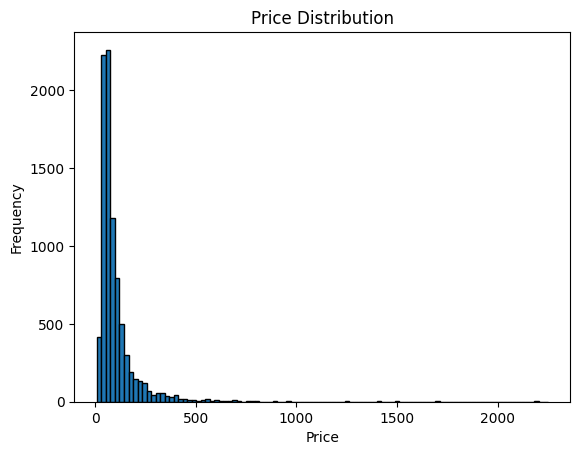

In [ ]:

plt.hist(filtered_df['price'], bins=100, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


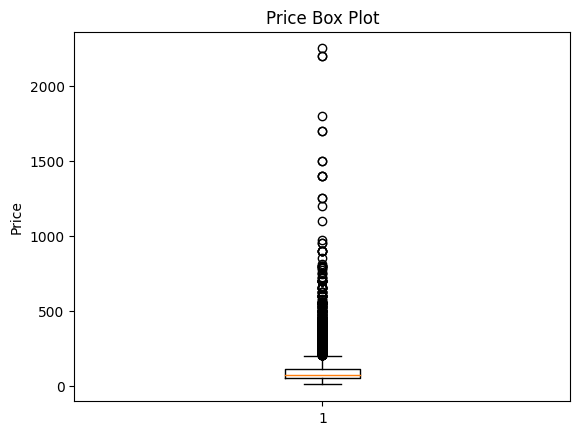

In [ ]:
plt.boxplot(filtered_df['price'])
plt.title('Price Box Plot')
plt.ylabel('Price')
plt.show()


area_type
Built-up  Area           98.880651
Carpet  Area             74.671477
Plot  Area              207.252453
Super built-up  Area     88.323004
Name: price, dtype: float64


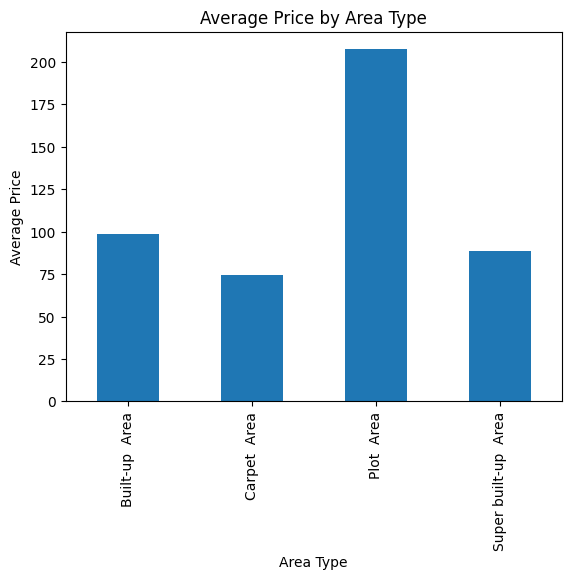

In [ ]:
price_by_area_type = filtered_df.groupby('area_type')['price'].mean()
print(price_by_area_type)

price_by_area_type.plot(kind='bar', title='Average Price by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Average Price')
plt.show()


In [ ]:
'''from scipy.stats import boxcox

# Apply Box-Cox transformation
df['boxcox_price'], fitted_lambda = boxcox(df['price'])

# Plot the transformed data
plt.hist(df['boxcox_price'], bins=30, edgecolor='k')
plt.title('Box-Cox Transformed Price Distribution')
plt.xlabel('Box-Cox Price')
plt.ylabel('Frequency')
plt.show()

print(f'Optimal lambda for Box-Cox transformation: {fitted_lambda}')'''


"from scipy.stats import boxcox\n\n# Apply Box-Cox transformation\ndf['boxcox_price'], fitted_lambda = boxcox(df['price'])\n\n# Plot the transformed data\nplt.hist(df['boxcox_price'], bins=30, edgecolor='k')\nplt.title('Box-Cox Transformed Price Distribution')\nplt.xlabel('Box-Cox Price')\nplt.ylabel('Frequency')\nplt.show()\n\nprint(f'Optimal lambda for Box-Cox transformation: {fitted_lambda}')"

In [ ]:
# Assuming 'area_type' is a non-numeric column
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])


In [ ]:
filtered_df.dtypes

area_type        object
availability     object
location         object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
bedroom           int64
hall              int64
kitchen           int64
dtype: object

In [ ]:
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

            total_sqft      bath   balcony     price   bedroom      hall  \
total_sqft    1.000000  0.069196  0.014460  0.100694  0.060183 -0.068009   
bath          0.069196  1.000000  0.280062  0.529639  0.892723 -0.435091   
balcony       0.014460  0.280062  1.000000  0.172299  0.275902  0.036094   
price         0.100694  0.529639  0.172299  1.000000  0.472286 -0.344094   
bedroom       0.060183  0.892723  0.275902  0.472286  1.000000 -0.463172   
hall         -0.068009 -0.435091  0.036094 -0.344094 -0.463172  1.000000   
kitchen      -0.068009 -0.435091  0.036094 -0.344094 -0.463172  1.000000   

             kitchen  
total_sqft -0.068009  
bath       -0.435091  
balcony     0.036094  
price      -0.344094  
bedroom    -0.463172  
hall        1.000000  
kitchen     1.000000  


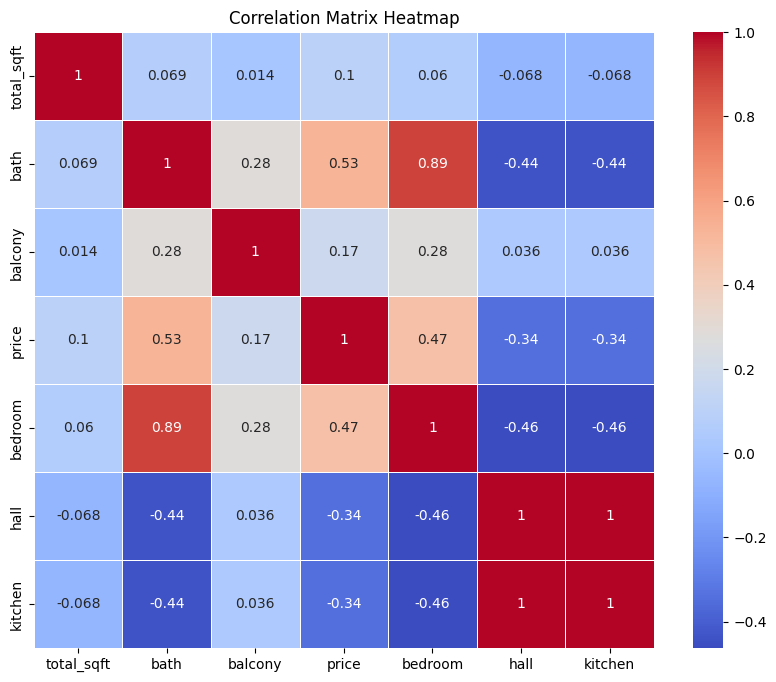

In [ ]:
# Plot heatmap



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
Q1 = filtered_df['price'].quantile(0.25)
Q3 = filtered_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
newdf = filtered_df[(filtered_df['price'] > lower_bound) & (filtered_df['price'] < upper_bound)]
print(newdf)


                  area_type   availability        location  society  \
0                Plot  Area         16-Jan  Sarjapur  Road  Saacesa   
1      Super built-up  Area         17-Jan     Thanisandra  Soitya    
3      Super built-up  Area         18-Jan      Whitefield  Suhamra   
4      Super built-up  Area         18-Jan     Hennur Road  Asadacy   
6      Super built-up  Area         18-Jan       Yelahanka  Prensya   
...                     ...            ...             ...      ...   
13310  Super built-up  Area  Ready To Move     Kaggalipura  Baowsig   
13315  Super built-up  Area  Ready To Move  Sarjapur  Road  Adeatlm   
13316  Super built-up  Area  Ready To Move  Dodda Nekkundi  Adstah    
13317  Super built-up  Area  Ready To Move     Thanisandra  SLaceda   
13319  Super built-up  Area  Ready To Move    Doddathoguru  Prianhi   

       total_sqft  bath  balcony  price  bedroom  hall  kitchen  
0          1240.0   4.0      0.0  110.0        4     0        0  
1          2087

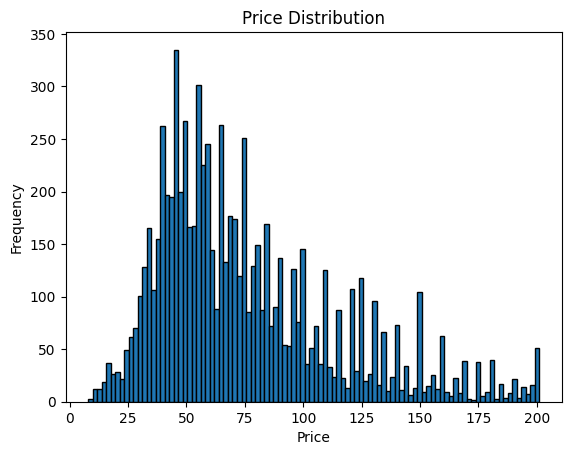

In [ ]:


plt.hist(newdf['price'], bins=100, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
newdf

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,hall,kitchen
0,Plot Area,16-Jan,Sarjapur Road,Saacesa,1240.0,4.0,0.0,110.0,4,0,0
1,Super built-up Area,17-Jan,Thanisandra,Soitya,2087.0,4.0,2.0,139.0,3,1,1
3,Super built-up Area,18-Jan,Whitefield,Suhamra,1170.0,2.0,1.0,56.0,2,1,1
4,Super built-up Area,18-Jan,Hennur Road,Asadacy,1359.0,2.0,2.0,104.0,2,1,1
6,Super built-up Area,18-Jan,Yelahanka,Prensya,1362.0,2.0,2.0,66.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Kaggalipura,Baowsig,950.0,2.0,1.0,47.0,2,1,1
13315,Super built-up Area,Ready To Move,Sarjapur Road,Adeatlm,1846.0,3.0,3.0,145.0,3,1,1
13316,Super built-up Area,Ready To Move,Dodda Nekkundi,Adstah,1155.0,2.0,1.0,46.0,2,1,1
13317,Super built-up Area,Ready To Move,Thanisandra,SLaceda,1140.0,2.0,1.0,36.0,2,1,1


In [ ]:
newdf

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom,hall,kitchen
0,Plot Area,16-Jan,Sarjapur Road,Saacesa,1240.0,4.0,0.0,110.0,4,0,0
1,Super built-up Area,17-Jan,Thanisandra,Soitya,2087.0,4.0,2.0,139.0,3,1,1
3,Super built-up Area,18-Jan,Whitefield,Suhamra,1170.0,2.0,1.0,56.0,2,1,1
4,Super built-up Area,18-Jan,Hennur Road,Asadacy,1359.0,2.0,2.0,104.0,2,1,1
6,Super built-up Area,18-Jan,Yelahanka,Prensya,1362.0,2.0,2.0,66.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Kaggalipura,Baowsig,950.0,2.0,1.0,47.0,2,1,1
13315,Super built-up Area,Ready To Move,Sarjapur Road,Adeatlm,1846.0,3.0,3.0,145.0,3,1,1
13316,Super built-up Area,Ready To Move,Dodda Nekkundi,Adstah,1155.0,2.0,1.0,46.0,2,1,1
13317,Super built-up Area,Ready To Move,Thanisandra,SLaceda,1140.0,2.0,1.0,36.0,2,1,1


In [ ]:
newdf.drop(["availability",'society'], axis=1, inplace=True)

<ipython-input-73-69ad6986490e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(["availability",'society'], axis=1, inplace=True)


In [ ]:
newdf.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
balcony       float64
price         float64
bedroom         int64
hall            int64
kitchen         int64
dtype: object

In [ ]:
newdf = newdf[newdf['total_sqft'] >= 500]

In [ ]:
# Get the list of categorical columns
#categorical_cols = newdf.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to categorical columns
#df_encoded = pd.get_dummies(newdf, columns=categorical_cols)

#print(df_encoded)

In [ ]:
newdf

,area_type,location,total_sqft,bath,balcony,price,bedroom,hall,kitchen
0,Plot Area,Sarjapur Road,1240.0,4.0,0.0,110.0,4,0,0
1,Super built-up Area,Thanisandra,2087.0,4.0,2.0,139.0,3,1,1
3,Super built-up Area,Whitefield,1170.0,2.0,1.0,56.0,2,1,1
4,Super built-up Area,Hennur Road,1359.0,2.0,2.0,104.0,2,1,1
6,Super built-up Area,Yelahanka,1362.0,2.0,2.0,66.0,2,1,1
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Kaggalipura,950.0,2.0,1.0,47.0,2,1,1
13315,Super built-up Area,Sarjapur Road,1846.0,3.0,3.0,145.0,3,1,1
13316,Super built-up Area,Dodda Nekkundi,1155.0,2.0,1.0,46.0,2,1,1
13317,Super built-up Area,Thanisandra,1140.0,2.0,1.0,36.0,2,1,1


In [ ]:
newdf

,area_type,location,total_sqft,bath,balcony,price,bedroom,hall,kitchen
0,Plot Area,Sarjapur Road,1240.0,4.0,0.0,110.0,4,0,0
1,Super built-up Area,Thanisandra,2087.0,4.0,2.0,139.0,3,1,1
3,Super built-up Area,Whitefield,1170.0,2.0,1.0,56.0,2,1,1
4,Super built-up Area,Hennur Road,1359.0,2.0,2.0,104.0,2,1,1
6,Super built-up Area,Yelahanka,1362.0,2.0,2.0,66.0,2,1,1
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Kaggalipura,950.0,2.0,1.0,47.0,2,1,1
13315,Super built-up Area,Sarjapur Road,1846.0,3.0,3.0,145.0,3,1,1
13316,Super built-up Area,Dodda Nekkundi,1155.0,2.0,1.0,46.0,2,1,1
13317,Super built-up Area,Thanisandra,1140.0,2.0,1.0,36.0,2,1,1


In [ ]:
#df_encoded = pd.get_dummies(newdf, columns=['area_type'])

In [ ]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

In [ ]:
#df_encoded

In [ ]:
# Apply one-hot encoding to the 'category' column
one_hot_encoded = pd.get_dummies(newdf['area_type'])

# Convert boolean values to binary values
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([newdf, one_hot_encoded], axis=1)

# Drop the original 'category' column
df_encoded.drop('area_type', axis=1, inplace=True)

# Display the DataFrame with one-hot encoding
print(df_encoded.head())

         location  total_sqft  bath  balcony  price  bedroom  hall  kitchen  \
0  Sarjapur  Road      1240.0   4.0      0.0  110.0        4     0        0   
1     Thanisandra      2087.0   4.0      2.0  139.0        3     1        1   
3      Whitefield      1170.0   2.0      1.0   56.0        2     1        1   
4     Hennur Road      1359.0   2.0      2.0  104.0        2     1        1   
6       Yelahanka      1362.0   2.0      2.0   66.0        2     1        1   

   Built-up  Area  Carpet  Area  Plot  Area  Super built-up  Area  
0               0             0           1                     0  
1               0             0           0                     1  
3               0             0           0                     1  
4               0             0           0                     1  
6               0             0           0                     1  


In [ ]:
# Assuming 'area_type' is a non-numeric column
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Plot heatmap

correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)



                      total_sqft      bath   balcony     price   bedroom  \
total_sqft              1.000000  0.199799  0.067208  0.285267  0.184072   
bath                    0.199799  1.000000  0.287001  0.619521  0.867722   
balcony                 0.067208  0.287001  1.000000  0.212061  0.292980   
price                   0.285267  0.619521  0.212061  1.000000  0.563841   
bedroom                 0.184072  0.867722  0.292980  0.563841  1.000000   
hall                   -0.108573 -0.411859  0.078426 -0.304695 -0.439968   
kitchen                -0.108573 -0.411859  0.078426 -0.304695 -0.439968   
Built-up  Area          0.019430  0.025832 -0.051323 -0.022383  0.040580   
Carpet  Area           -0.008696  0.004308 -0.023912  0.001896  0.004457   
Plot  Area              0.072730  0.328122 -0.045115  0.238981  0.351432   
Super built-up  Area   -0.058502 -0.217116  0.075037 -0.122151 -0.243732   

                          hall   kitchen  Built-up  Area  Carpet  Area  \
total_sqft   

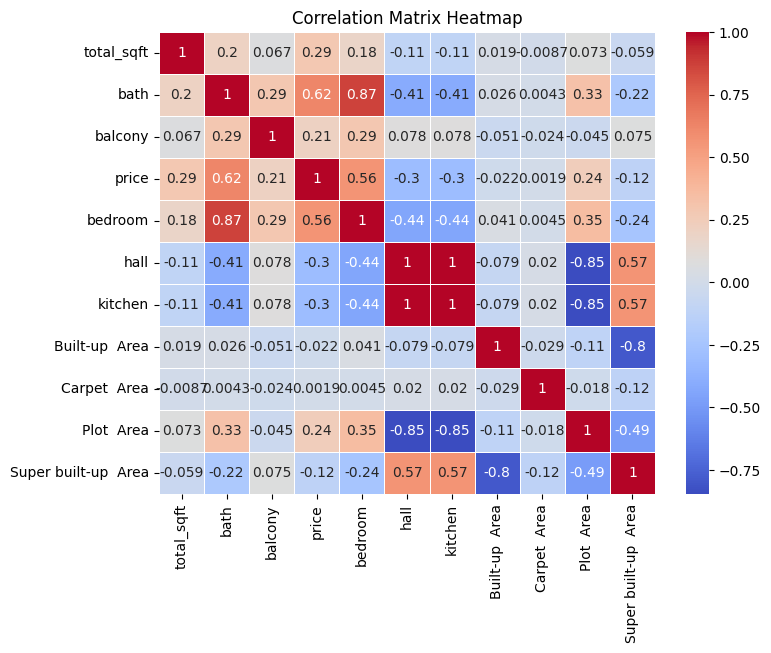

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df_encoded

,location,total_sqft,bath,balcony,price,bedroom,hall,kitchen,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Sarjapur Road,1240.0,4.0,0.0,110.0,4,0,0,0,0,1,0
1,Thanisandra,2087.0,4.0,2.0,139.0,3,1,1,0,0,0,1
3,Whitefield,1170.0,2.0,1.0,56.0,2,1,1,0,0,0,1
4,Hennur Road,1359.0,2.0,2.0,104.0,2,1,1,0,0,0,1
6,Yelahanka,1362.0,2.0,2.0,66.0,2,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13310,Kaggalipura,950.0,2.0,1.0,47.0,2,1,1,0,0,0,1
13315,Sarjapur Road,1846.0,3.0,3.0,145.0,3,1,1,0,0,0,1
13316,Dodda Nekkundi,1155.0,2.0,1.0,46.0,2,1,1,0,0,0,1
13317,Thanisandra,1140.0,2.0,1.0,36.0,2,1,1,0,0,0,1


In [ ]:
df_encoded.drop(['bath','Plot  Area','hall','Built-up  Area'], axis=1)

,location,total_sqft,balcony,price,bedroom,kitchen,Carpet Area,Super built-up Area
0,Sarjapur Road,1240.0,0.0,110.0,4,0,0,0
1,Thanisandra,2087.0,2.0,139.0,3,1,0,1
3,Whitefield,1170.0,1.0,56.0,2,1,0,1
4,Hennur Road,1359.0,2.0,104.0,2,1,0,1
6,Yelahanka,1362.0,2.0,66.0,2,1,0,1
...,...,...,...,...,...,...,...,...
13310,Kaggalipura,950.0,1.0,47.0,2,1,0,1
13315,Sarjapur Road,1846.0,3.0,145.0,3,1,0,1
13316,Dodda Nekkundi,1155.0,1.0,46.0,2,1,0,1
13317,Thanisandra,1140.0,1.0,36.0,2,1,0,1


In [ ]:
# Apply one-hot encoding to the 'category' column
one_hot_encoded = pd.get_dummies(df_encoded['location'])

# Convert boolean values to binary values
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

# Drop the original 'category' column
df_encoded.drop('location', axis=1, inplace=True)

# Display the DataFrame with one-hot encoding
print(df_encoded.head())

   total_sqft  bath  balcony  price  bedroom  hall  kitchen  Built-up  Area  \
0      1240.0   4.0      0.0  110.0        4     0        0               0   
1      2087.0   4.0      2.0  139.0        3     1        1               0   
3      1170.0   2.0      1.0   56.0        2     1        1               0   
4      1359.0   2.0      2.0  104.0        2     1        1               0   
6      1362.0   2.0      2.0   66.0        2     1        1               0   

   Carpet  Area  Plot  Area  ...  Thubarahalli  Tumkur Road  Uttarahalli  \
0             0           1  ...             0            0            0   
1             0           0  ...             0            0            0   
3             0           0  ...             0            0            0   
4             0           0  ...             0            0            0   
6             0           0  ...             0            0            0   

   Varthur  Vijayanagar  Vittasandra  Whitefield  Yelahanka  \
0    

In [ ]:
df_encoded

,total_sqft,bath,balcony,price,bedroom,hall,kitchen,Built-up Area,Carpet Area,Plot Area,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1240.0,4.0,0.0,110.0,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2087.0,4.0,2.0,139.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,1.0,56.0,2,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1359.0,2.0,2.0,104.0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1362.0,2.0,2.0,66.0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13310,950.0,2.0,1.0,47.0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,1846.0,3.0,3.0,145.0,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,1155.0,2.0,1.0,46.0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,1140.0,2.0,1.0,36.0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **MODEL IMPLEMENTATION**

###**Statistical Linear Regression**

In [ ]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
X= df_encoded.drop(columns='price')
y= df_encoded['price']

In [ ]:
X = sm.add_constant(X)


In [ ]:
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     71.81
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:15:24   Log-Likelihood:                -36656.
No. Observations:                7917   AIC:                         7.362e+04
Df Residuals:                    7761   BIC:                         7.471e+04
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   



```
# This is formatted as code
```

####**LR** **Assumptions**

#####**1 - Linear Relationship**

<Axes: xlabel='bath', ylabel='price'>

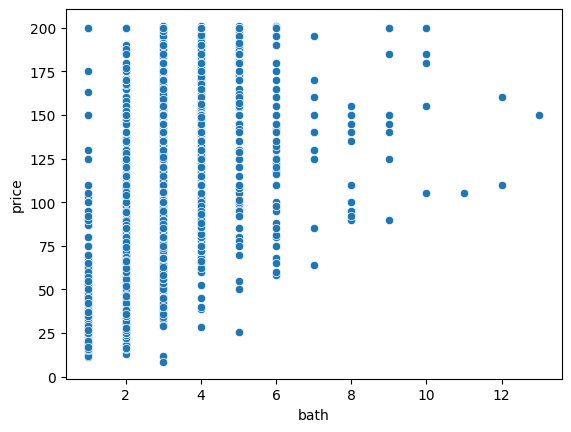

In [ ]:
sns.scatterplot(data=df_encoded, x="bath", y="price")

<Axes: xlabel='balcony', ylabel='price'>

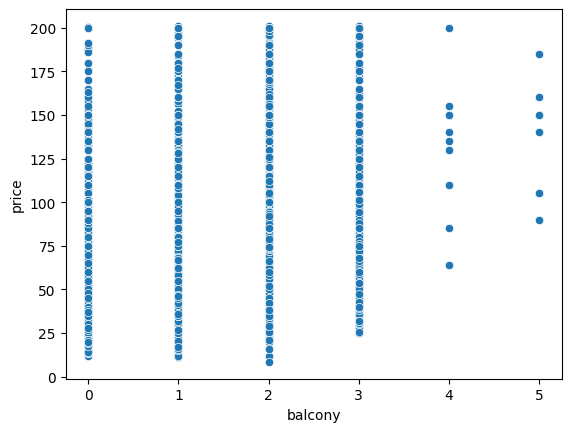

In [ ]:
sns.scatterplot(data=df_encoded, x="balcony", y="price")

<Axes: xlabel='total_sqft', ylabel='price'>

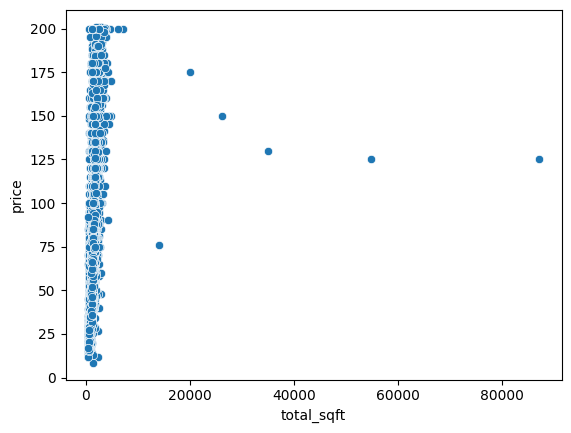

In [ ]:
sns.scatterplot(data=df_encoded, x="total_sqft", y="price")


#####**Multicollinearity**

In [ ]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                Feature       VIF
0                 const  0.000000
1            total_sqft  1.061904
2                  bath  4.566928
3               balcony  1.298436
4               bedroom  4.637426
..                  ...       ...
154         Vittasandra       inf
155          Whitefield       inf
156           Yelahanka       inf
157  Yelahanka New Town       inf
158        Yeshwanthpur       inf

[159 rows x 2 columns]


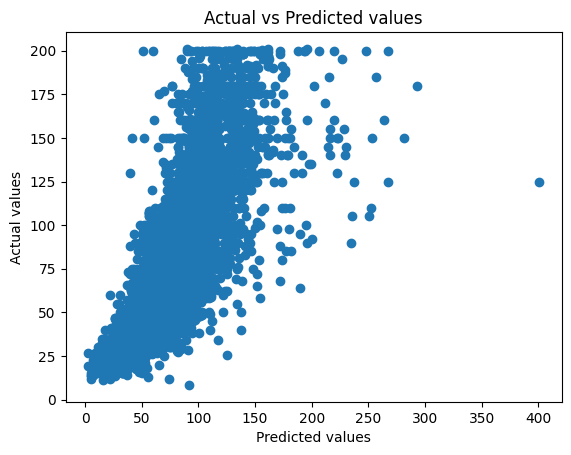

In [ ]:
# Plotting the actual vs predicted values
predicted_values = model.predict(X)
plt.scatter(predicted_values, y)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual vs Predicted values')
plt.show()


#####**No Autocorrelation**

In [ ]:
# Checking for independence using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
print('Durbin-Watson statistic:', dw)


Durbin-Watson statistic: 1.9672190617970895


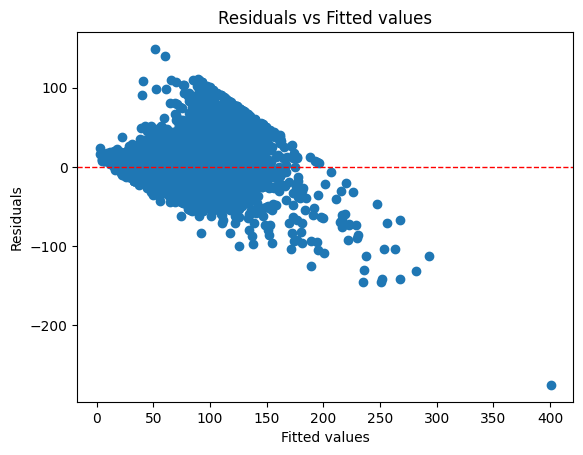

In [ ]:
# Plotting residuals vs fitted values
residuals = model.resid
plt.scatter(predicted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.show()


#####**Residual are normally distributed**

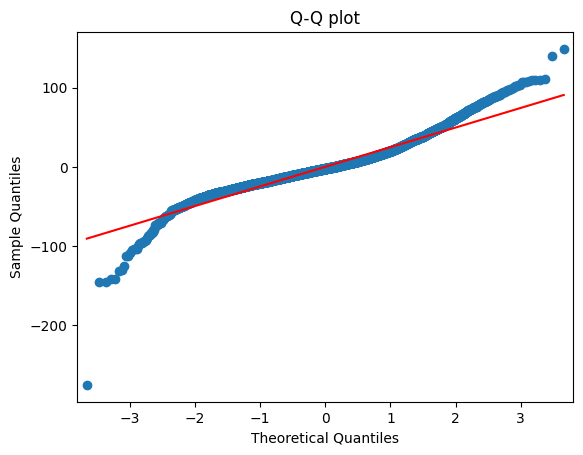

Shapiro-Wilk test: ShapiroResult(statistic=0.9422212839126587, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Q-Q plot for residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test:', shapiro_test)

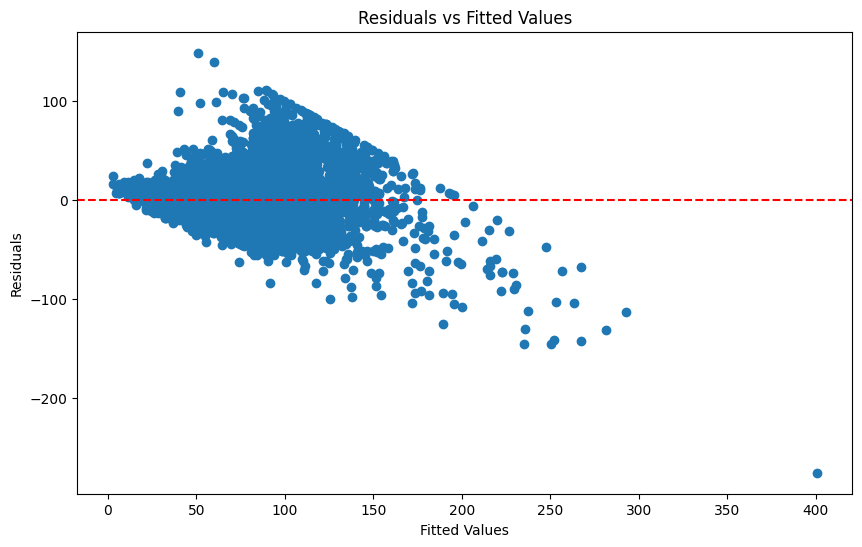

In [ ]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In [ ]:
# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

test_results = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, test_results)))


{'Lagrange multiplier statistic': 3111.163147842876, 'p-value': 0.0, 'f-value': 32.41453141415255, 'f p-value': 0.0}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###Linear Regression

In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Print model coefficients
print("Coefficients: \n", lr.coef_)
print("Intercept: \n", lr.intercept_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Coefficients: 
 [-4.08306466e-12  3.86386258e-03  1.51629593e+01  2.19360313e+00
  6.25443777e+00 -9.21408937e+00 -9.21408937e+00 -2.17157089e+00
  4.00711457e+00 -4.05664671e+00  2.22110303e+00  3.25696243e+01
 -6.70015054e+00  1.93117448e+01  9.69243184e+00 -1.48716717e+01
 -1.51646644e+01 -1.15567145e+01 -3.50884770e+01  4.99038554e-01
  1.34605367e+01  2.46665443e+01 -2.54629191e+01  1.79364727e+01
 -2.64973871e+01  1.17014275e+01  1.97244482e+01  7.23066554e-01
  2.42126947e+00 -1.39465312e+00 -4.12273293e+00 -1.69680090e+01
 -2.09043501e+01 -3.07888789e+00 -6.01024974e+00  1.02909222e+01
  6.90403250e+00  3.99648530e+01 -2.84218392e+01 -2.39273574e+01
 -2.87841610e+01  2.91703262e+01  1.29712227e+01 -6.07211290e+00
  1.02543877e-01 -3.47694982e+01 -2.72661502e+01 -1.43836139e+01
 -1.51611205e+01 -2.06145839e+01  8.25795161e+00  1.10513979e-01
 -9.57385809e+00 -2.29807245e+01  3.23804400e+01  3.71243495e+01
 -1.65153343e+01 -2.53036305e+01 -1.33444676e+01  5.53151773e+01
 -2.69681

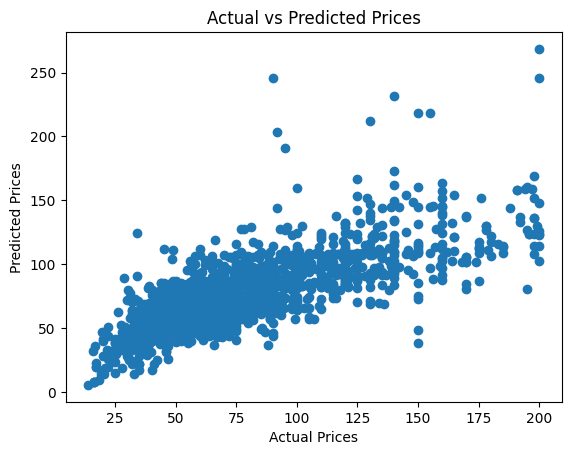

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


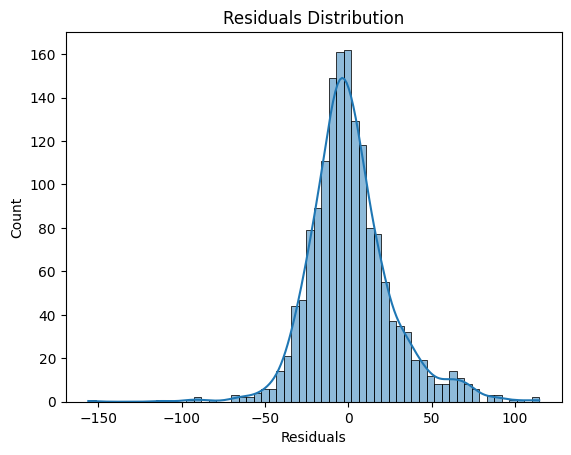

In [ ]:
# Plotting residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

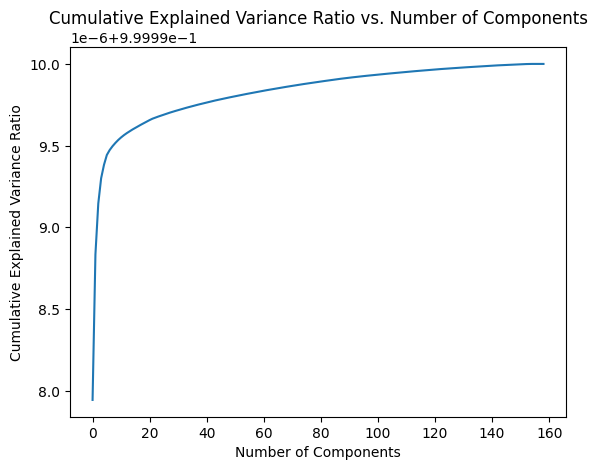

Optimal number of components: 1


In [ ]:
# Perform PCA on the dataset
pca = PCA()
pca.fit(X)

# Compute the cumulative explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(cumsum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.show()

# Determine the optimal number of components
d = np.argmax(cumsum >= 0.95) + 1
print(f'Optimal number of components: {d}')

# Select the top d components from the PCA transformation
X_pca = pca.transform(X)[:, :d]

In [ ]:


# Assuming df_encoded is your DataFrame with the 'price' column as the target variable
X = df_encoded.drop(columns='price')
y = df_encoded['price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Keep the top 20 components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Identify the top features contributing to each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = X.columns

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, index=feature_names, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display the top features for each principal component
top_features = {}
for i in range(20):
    top_features[f'PC{i+1}'] = loading_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(10).index.tolist()

# Print the top features for each principal component
for pc, features in top_features.items():
    print(f"\nTop features contributing to {pc}:")
    for feature in features:
        print(feature)


Mean Squared Error: 840.099408018801
R^2 Score: 0.43318270376440937

Top features contributing to PC1:
hall
kitchen
Plot  Area
Super built-up  Area
bedroom
bath
Built-up  Area
total_sqft
Chikka Tirupathi
Ramamurthy Nagar

Top features contributing to PC2:
balcony
bath
bedroom
Built-up  Area
Super built-up  Area
total_sqft
Electronic City
Electronic City Phase II
kitchen
hall

Top features contributing to PC3:
Built-up  Area
Super built-up  Area
Plot  Area
balcony
hall
kitchen
bath
bedroom
total_sqft
Chandapura

Top features contributing to PC4:
Carpet  Area
Bhoganhalli
Electronic City
Old Madras Road
Kasavanhalli
KR Puram
Kereguddadahalli
Akshaya Nagar
Hebbal
Old Airport Road

Top features contributing to PC5:
balcony
Sarjapur  Road
total_sqft
Kaggadasapura
Jigani
Thanisandra
BTM 2nd Stage
Raja Rajeshwari Nagar
Rajiv Nagar
Kodihalli

Top features contributing to PC6:
Kanakpura Road
total_sqft
Sarjapur  Road
Hebbal
5th Phase JP Nagar
Kengeri Satellite Town
9th Phase JP Nagar
Mallasandra

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 617.6728634779041
R^2 Score: 0.5832544826328392


In [ ]:
from sklearn.linear_model import RidgeCV

# Define alpha values for Ridge Regression
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize RidgeCV with cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Train the model
ridge_cv.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Best Alpha:", ridge_cv.alpha_)


Mean Squared Error: 617.053898868231
R^2 Score: 0.5836720996947864
Best Alpha: 1.0


###**RANDOM FOREST**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# assume X is your original dataset with 150 columns
# and y is your target variable

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest regressor model
rfc = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the training data
rfc.fit(X_train, y_train)

# get the feature importances
importances = rfc.feature_importances_

# create a dataframe to store the feature importances
feat_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# sort the feature importances in descending order
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# print the top 10 most important features
print(feat_importances.head(10))

# select the top features based on their importances
top_features = feat_importances.head(10)['Feature']

# create a new dataset with only the top features
X_selected = X[top_features]

print(X_selected.shape)

          Feature  Importance
0      total_sqft    0.663862
3         bedroom    0.040130
1            bath    0.023599
2         balcony    0.018229
5         kitchen    0.016018
4            hall    0.013170
8      Plot  Area    0.011986
133  Rajaji Nagar    0.011437
81   Indira Nagar    0.009072
105   Koramangala    0.008083
(7917, 10)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_encoded is your DataFrame with the 'price' column as the target variable
X = df_encoded.drop(columns='price')
y = df_encoded['price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Keep the top 20 components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 417.7506767745144
R^2 Score: 0.7181425116483129


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 349.3534752489351
R^2 Score: 0.7642902847198803


In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [10, 20,30],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Best Hyperparameters:", grid_search.best_params_)


Mean Squared Error: 354.48300643731636
R^2 Score: 0.760829376437596
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}


###**KNN**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df_encoded is your DataFrame with the 'price' column as the target variable
X = df_encoded.drop(columns='price')
y = df_encoded['price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Keep the top 20 components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 474.0492704059343
R^2 Score: 0.6801577013753439


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 518.5032067342172
R^2 Score: 0.6501645127644284


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # You can adjust the range of neighbors
    'weights': ['uniform', 'distance'],  # You can choose between uniform and distance weights
    'metric': ['euclidean', 'manhattan']  # You can choose different distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator
best_knn = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Best Hyperparameters:", grid_search.best_params_)


Mean Squared Error: 456.5551268272632
R^2 Score: 0.6919610463944821
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


###**SVM**

In [ ]:
# Assuming df_encoded is your DataFrame with the 'price' column as the target variable
X = df_encoded.drop(columns='price')
y = df_encoded['price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Keep the top 20 components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

from sklearn.svm import SVR

# Train the Support Vector Regressor model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust kernel, C, and epsilon parameters
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 799.6341896103581
R^2 Score: 0.4604846938276411


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train the Support Vector Regressor model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust kernel, C, and epsilon parameters
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 677.0685382825608
R^2 Score: 0.5431800634873011


###**GRADIENT BOOSTING**

In [ ]:
# Assuming df_encoded is your DataFrame with the 'price' column as the target variable
X = df_encoded.drop(columns='price')
y = df_encoded['price']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=20)  # Keep the top 20 components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# You can adjust n_estimators, learning_rate, max_depth, and other parameters
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 555.789107268015
R^2 Score: 0.6250076168940727


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# You can adjust n_estimators, learning_rate, max_depth, and other parameters
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 407.4824587281579
R^2 Score: 0.7250705055674123


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [10, 25, 50],  # Number of trees in the gradient boosting model
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate of the gradient boosting model
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator
best_gbr = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Best Hyperparameters:", grid_search.best_params_)


Mean Squared Error: 359.267593198126
R^2 Score: 0.7576012030744431
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
